# Importe de vulnerabilidades
Se importan las vulnerabilidades publicadas en la *National Vulnerability Database (NVD)* de los años 2022 y 2023

In [1]:
import requests     #Realizar peticiones
import gzip         #Compresión y descompresión
import json         #Lectura del formato json
from tqdm import tqdm   #Seguimiento de bucles

url_fmt = 'https://nvd.nist.gov/feeds/json/cve/1.1/nvdcve-1.1-{}.json.gz'   #URL a la fuente de vulnerabilidades

cve_items = list()  #Lista dónde se guardará cada vulnerabilidad

#Agregar las vulnerabilidades de 2022 y 2023 a la lista cve_items
for year in tqdm(range(2022, 2023)):
    content = requests.get(url_fmt.format(year)).content
    json_data = gzip.decompress(content)
    data = json.loads(json_data)
    cve_items += data['CVE_Items']

100%|██████████| 1/1 [00:07<00:00,  7.62s/it]


### Función para asignar el tipo de ataque a cada vulnerabilidad
Dado que la NVD no proporciona información sobre el tipo de ataque, he creado una lista que incluye algunos de los tipos de ataque más comunes. Esta lista se organiza de menor a mayor severidad según mi criterio. Como resultado, la función devuelve un elemento de la lista con una probabilidad de ocurrencia de mayor a menor.

In [2]:
#Asignación de tipos de ataques
def Set_Attack_Type():
    #Tipos de ataques comunes
    Attack_Types = [
        'Brute Force Attacks',
        'Man-in-the-Middle (MitM) Attacks',
        'Malware (Viruses, Trojans, Worms)',
        'Cross-Site Scripting (XSS)',
        'SQL Injection',
        'Distributed Denial of Service (DDoS)',
        'Advanced Persistent Threats (APTs)'
    ]
    weights = [1 / (i + 1) for i in range(len(Attack_Types))]   #Pesos de mayor a menor probabilidad
    return random.choices(Attack_Types, weights=weights)[0]     #Retorno del tipo de ataque

# Generación del conjunto de datos

Mi objetivo es generar un conjunto de datos similar al ejemplo proporcionado. Sin embargo, las vulnerabilidades importadas carecen de cierta información necesaria. Por lo tanto, he optado por completar los campos faltantes con guiones ("-"). Esta elección se basa en la observación de que el ejemplo de referencia también contiene información incompleta, la cual no es relevante para la resolución del problema en cuestión.

En cuanto a la información que considero relevante y que no se encuentra en las vulnerabilidades importadas, la completo siguiendo las pautas y posibilidades presentadas en el ejemplo de referencia. Para ello, genero información aleatoria que se ajusta a dichas pautas.

En el ejemplo, se observa que la característica 'Severity' se corresponde con el puntaje CVSS V3.1. Siguiendo las pautas para abordar el problema, donde la severidad se define con valores como 'Baja', 'Media' y 'Alta', se utiliza esta característica para asignar la severidad de la vulnerabilidad. Además, se crea una nueva columna llamada 'CVSS_Score', la cual almacena el puntaje CVSS V3.1.

In [3]:
import random   #Aleatoriedad
from datetime import datetime   #Manejo de fechas
import pandas as pd #Manejo de tablas

rows = list()   #Lista donde se concatenará las caracteristicas de cada vulnerabilidad
Exploitabilities = ['Functional', 'High', 'Unproven']   #Posibilidades de la explotabilidad

#Se recorre cada vulnerabilidad importada
for cve_item in tqdm(cve_items):
    #Comprobar si existen los siguientes elementos en las vulnerabilidades importadas
    try:
        Related_Finding = cve_item['cve']['references']['reference_data'][0]
        Severity = cve_item['impact']['baseMetricV3']['cvssV3']['baseScore']
        CWE_ids = cve_item['cve']['problemtype']['problemtype_data'][0]['description'][0]
    except:
        continue

    Related_Finding = cve_item['cve']['references']['reference_data'][0]['url'] #Asignar el correo del fabricante afectado por la vulnerabilidad
    Vulnerability_Id = cve_item['cve']['CVE_data_meta']['ID']   #Asignar la identificación de la vulnerabilidad
    Where = cve_item['cve']['CVE_data_meta']['ASSIGNER']    #Asginar el enlace a la referencia
    Stream = '-'    #Información faltante
    Specific = '-'  #Información faltante
    Description = cve_item['cve']['description']['description_data'][0]['value']    #Descripción de la vulnerabilidad
    Status = 'OPEN' #Única posibildiad observada del ejemplo
    Severity = cve_item['impact']['baseMetricV3']['cvssV3']['baseSeverity'] #Asignar severidad
    Requirements = '-'  #Información faltante
    Impact = '-'    #Información faltante
    Threat = '-'    #Información faltante
    Recommendation = '-'    #Información faltante
    External_BTS = '-'  #Información faltante
    Compromised_Attributes = '' #Información faltante
    Tags = '-'  #Información faltante
    Business_Critically = '-'   #Información faltante
    Type = Set_Attack_Type()    #Asignar tipo de ataque con la función Set_Attack_Type()
    Report_Moment = cve_item['publishedDate']   #Se usa la fecha de publicación como la fecha de reporte
    Empty_Column = '-'  #Información faltante
    Age_in_days = (datetime.now().date() - datetime.strptime(Report_Moment, '%Y-%m-%dT%H:%MZ').date()).days #Días transcurridos entre el día del reporte y el día actual
    CVSSV3_string_vector = cve_item['impact']['baseMetricV3']['cvssV3']['vectorString'] #Asignar el vector de calificación
    Attack_Vector = cve_item['impact']['baseMetricV3']['cvssV3']['attackVector']    #Asignar el attackVector
    Attack_Complexity = cve_item['impact']['baseMetricV3']['cvssV3']['attackComplexity']    #Asignar el attackComplexity
    Privileges_Required = cve_item['impact']['baseMetricV3']['cvssV3']['privilegesRequired']    #Asignar el privilegesRequired
    User_Interaction = cve_item['impact']['baseMetricV3']['cvssV3']['userInteraction']  #Asignar el userInteraction
    Severity_Scope = cve_item['impact']['baseMetricV3']['cvssV3']['scope']  #Asignar el scope
    Confidentiality_Impact = cve_item['impact']['baseMetricV3']['cvssV3']['confidentialityImpact']  #Asignar el confidentialityImpact
    Integrity_Impact = cve_item['impact']['baseMetricV3']['cvssV3']['integrityImpact']  #Asignar el integrityImpact
    Availability_Impact = cve_item['impact']['baseMetricV3']['cvssV3']['availabilityImpact']    #Asignar el availabilityImpact
    Exploitability = random.choice(Exploitabilities)    #Asignar la explotabilidad con base en las posibilidades observadas en el ejemplo
    Remediation_Level = 'Official Fix' if random.random() < 0.9 else 'Unavailable'  #Asignar el nivel de remediación con base en las posibilidades observadas en el ejemplo (90% de probabilidad para 'Official Fix' y 10% de probabilidad para 'Unavailable')
    Report_Confidence = 'Confirmed' #Única posibilidad observada en el ejemplo
    CWE_ids = cve_item['cve']['problemtype']['problemtype_data'][0]['description'][0]['value']  #Asignar la identificación CWE
    Commit_Hash = '-'   #Información faltante
    Root_Nickname = '-' #Información faltante
    Group = '-' #Información faltante
    CVSSV3_score = cve_item['impact']['baseMetricV3']['cvssV3']['baseScore']    #Asignar puntaje CVSS V3.1

    #Agregar las carácteristicas a una nueva fila
    rows.append(
        [
            Related_Finding,
            Vulnerability_Id,
            Where,
            Stream,
            Specific,
            Description,
            Status,
            Severity,
            Requirements,
            Impact,
            Threat,
            Recommendation,
            External_BTS,
            Compromised_Attributes,
            Tags,
            Business_Critically,
            Type,
            Report_Moment,
            Empty_Column,
            Age_in_days,
            CVSSV3_string_vector,
            Attack_Vector,
            Attack_Complexity,
            Privileges_Required,
            User_Interaction,
            Severity_Scope,
            Confidentiality_Impact,
            Integrity_Impact,
            Availability_Impact,
            Exploitability,
            Remediation_Level,
            Report_Confidence,
            CWE_ids,
            Commit_Hash,
            Root_Nickname,
            Group,
            CVSSV3_score
        ]
    )

#Construir el conjunto de datos a partir de las filas y asignando el nombre a las respectivas columnas
df = pd.DataFrame(
    rows,
    columns=[
        'Related Finding',
        'Vulnerability Id',
        'Where',
        'Stream',
        'Specific',
        'Description',
        'Status',
        'Severity',
        'Requirements',
        'Impact',
        'Threat',
        'Recommendation',
        'External BTS',
        'Compromised Attributes',
        'Tags',
        'Business Critically',
        'Type',
        'Report Moment',
        'Empty Column',
        'Age in days',
        'CVSSV3 string vector',
        'Attack Vector',
        'Attack Complexity',
        'Privileges Required',
        'User Interaction',
        'Severity Scope',
        'Confidentiality Impact',
        'Integrity Impact',
        'Availability Impact',
        'Exploitability',
        'Remediation Level',
        'Report Confidence',
        'CWE ids',
        'Commit Hash',
        'Root Nickname',
        'Group',
        'CVSS_Score'
    ]
)

df.to_csv('dataset.csv')

100%|██████████| 24256/24256 [00:00<00:00, 43537.82it/s]


# Preprocesamiento del conjunto de datos

## Extracción de las columnas relevantes
Se importa la base de datos y se extrae las columnas con información relevante. Aunque la columna 'Description' contenga información relevante, se descarta debido a la infinidad de posibilidades que posee, por ende no se le puede asignar un valor númerico.

In [23]:
import pandas as pd #Manejo de tablas

dataframe = pd.read_csv('dataset.csv')  #Se guarda el dataset en un dataframe

#Extraer las columnas que contengan información relevante
new_df = dataframe[['Severity',
                    'Type',
                    'Age in days',
                    'Attack Vector',
                    'Attack Complexity',
                    'Privileges Required',
                    'User Interaction',
                    'Severity Scope',
                    'Confidentiality Impact',
                    'Integrity Impact',
                    'Availability Impact',
                    'Exploitability',
                    'Remediation Level',
                    'CVSS_Score']]

## Asignación numérica a las columnas

Se le asigna un valor numérico a las columnas de tipo texto. Los valores se asignan empezando desde el 1 quién representa menor severidad y aumentando mientras aumenta la severidad.

In [24]:
#No mostrar las advertencias de manera global
import warnings
warnings.filterwarnings("ignore")

mapeo = {'LOW': 1, 'MEDIUM': 2, 'HIGH': 3, 'CRITICAL': 4}   #mapeo columna Severity
new_df['Severity'] = new_df['Severity'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de Severity

#mapeo columna Type
mapeo = {'Brute Force Attacks':1,
        'Man-in-the-Middle (MitM) Attacks':2,
        'Malware (Viruses, Trojans, Worms)':3,
        'Cross-Site Scripting (XSS)':4,
        'SQL Injection':5,
        'Distributed Denial of Service (DDoS)':6,
        'Advanced Persistent Threats (APTs)':7
}
new_df['Type'] = new_df['Type'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de Type

#mapeo columna Attack Vector
mapeo = {'NETWORK':4, 'Network':4,
         'ADJACENT_NETWORK':3, 'Adjacent':3,
         'LOCAL':2, 'Local':2,
         'PHYSICAL':1, 'Physical':1
}
new_df['Attack Vector'] = new_df['Attack Vector'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de Attack Vector

mapeo = {'LOW':2, 'Low':2, 'HIGH':1, 'High':1} #mapeo columna Attack Complexity
new_df['Attack Complexity'] = new_df['Attack Complexity'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de Attack Complexity

mapeo = {'NONE':3, 'None':3, 'LOW':2, 'Low':2, 'HIGH':1, 'High':1}   #mapeo columna Privileges Required
new_df['Privileges Required'] = new_df['Privileges Required'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de Privileges Required

mapeo = {'NONE':2, 'None':2, 'REQUIRED':1, 'Required':1}    #mapeo columna User Interaction
new_df['User Interaction'] = new_df['User Interaction'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de User Interaction

mapeo = {'UNCHANGED':1, 'Unchanged':1, 'CHANGED':2, 'Changed':2}  #mapeo de columna Severity Scope
new_df['Severity Scope'] = new_df['Severity Scope'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de Severity Scope

mapeo = {'NONE':1, 'None':1, 'LOW':2, 'Low':2, 'HIGH':3, 'High':3}  #mapeo de columna Confidentiality Impact, Integrity Impact, Availability Impact
new_df['Confidentiality Impact'] = new_df['Confidentiality Impact'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de Confidentiality Impact
new_df['Integrity Impact'] = new_df['Integrity Impact'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de Integrity Impact
new_df['Availability Impact'] = new_df['Availability Impact'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de Availability Impact

mapeo = {'Unproven':1, 'Functional':2, 'High':3}  #mapeo de columna Exploitability
new_df['Exploitability'] = new_df['Exploitability'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de Exploitability

mapeo = {'Official Fix':1, 'Unavailable':2}  #mapeo de columna Remediation Level
new_df['Remediation Level'] = new_df['Remediation Level'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de Remediation Level

new_df[0:5]

,Severity,Type,Age in days,Attack Vector,Attack Complexity,Privileges Required,User Interaction,Severity Scope,Confidentiality Impact,Integrity Impact,Availability Impact,Exploitability,Remediation Level,CVSS_Score
0,2,1,604,2,2,2,2,2,3,1,1,3,1,6.5
1,2,3,604,2,2,2,2,2,3,1,1,3,1,6.5
2,2,5,542,1,2,3,2,1,3,3,3,2,1,6.8
3,1,1,542,1,2,3,2,1,2,1,1,2,1,2.4
4,2,7,167,2,2,2,2,1,3,1,1,3,1,5.5


## Verificar los tipos de datos

Se verifica que todas las columnas tenga tipos de datos numéricos.

In [26]:
for i in new_df.columns:
    print(i, "Tipo: ", new_df[i].dtype)

Severity Tipo:  int32
Type Tipo:  int32
Age in days Tipo:  int64
Attack Vector Tipo:  int32
Attack Complexity Tipo:  int32
Privileges Required Tipo:  int32
User Interaction Tipo:  int32
Severity Scope Tipo:  int32
Confidentiality Impact Tipo:  int32
Integrity Impact Tipo:  int32
Availability Impact Tipo:  int32
Exploitability Tipo:  int32
Remediation Level Tipo:  int32
CVSS_Score Tipo:  float64


## Función de prioridad

Agregar el valor de prioridad de cada vulnerabilidad con base en la funcón de prioridad definida.
$$
Priority = 2S + 3T + \frac{D}{30} + AV + AC + PR + UI + SS + 3C + 3I + 3A + 2E + R + 4VS
$$

In [27]:
#Función que aplica la formula
def formula(row):
    return 2*row['Severity'] + 3*row['Type'] + (row['Age in days']/30) + row['Attack Vector'] + row['Attack Complexity'] + row['Privileges Required'] + row['User Interaction'] + row['Severity Scope'] + 3*row['Confidentiality Impact'] + 3*row['Integrity Impact'] + 3*row['Availability Impact'] + 2*row['Exploitability'] + row['Severity'] + 4*row['CVSS_Score']

#Aplicar la función a cada fila
new_df['Priority'] = new_df.apply(formula, axis=1)

new_df[0:5]

,Severity,Type,Age in days,Attack Vector,Attack Complexity,Privileges Required,User Interaction,Severity Scope,Confidentiality Impact,Integrity Impact,Availability Impact,Exploitability,Remediation Level,CVSS_Score,Priority
0,2,1,604,2,2,2,2,2,3,1,1,3,1,6.5,86.133333
1,2,3,604,2,2,2,2,2,3,1,1,3,1,6.5,92.133333
2,2,5,542,1,2,3,2,1,3,3,3,2,1,6.8,106.266667
3,1,1,542,1,2,3,2,1,2,1,1,2,1,2.4,58.666667
4,2,7,167,2,2,2,2,1,3,1,1,3,1,5.5,84.566667


## Correlación de datos

Se muestra la correlación de cada característica con la prioridad.

In [32]:
corrmat = new_df.corr()
corrmat['Priority']

Severity                  0.834688
Type                      0.346378
Age in days               0.277838
Attack Vector             0.133471
Attack Complexity         0.037475
Privileges Required       0.240492
User Interaction          0.253662
Severity Scope           -0.267521
Confidentiality Impact    0.548601
Integrity Impact          0.637268
Availability Impact       0.620410
Exploitability            0.103032
Remediation Level         0.002902
CVSS_Score                0.874745
Priority                  1.000000
Name: Priority, dtype: float64

## División de datos

Se dividen los datos en un 70% para entrenamiento y un 30% para prueba.

In [47]:
from sklearn.model_selection import train_test_split    #Libreria que se encarga de la división de datos

#Se define las primeras 14 columnas como entradas (Todas las columnas excepto la prioridad) y la prioridad como salida esperada
#Se mezclan los datos para evitar que se sobre entrenen los valores con edad en días mayores, ya que las vulnerabilidades
#se importan desde las más antiguas a las más recientes.
X_train, X_test, y_train, y_test = train_test_split(new_df[new_df.columns[:14]], new_df['Priority'], test_size=0.3, shuffle=True)

# Entrenamiento y métricas

## Métricas

Las métricas a utilizar son las más usadas para problemas de regresión:

**MSE (Error Cuadrático Medio):** Calcula el promedio de los errores al cuadrado entre las predicciones y los valores reales. Da más peso a los errores grandes y es sensible a valores atípicos.

**MAE (Error Absoluto Medio):** Calcula el promedio de los valores absolutos de los errores entre las predicciones y los valores reales. Es menos sensible a valores atípicos y proporciona una medida más directa del error promedio.


## Elección de cantidad de neuronas
Se entrena la red neuronal con los datos de entrenamiento variando el número de neuronas en la capa oculta y se mide el MSE de los datos de prueba y de entrenamiento, con el fin de elegir la cantidad de neuronas que presenta menor error en ambos conjuntos de datos.

In [48]:
from sklearn.metrics import mean_squared_error as MSE   #Error cuadrático medio
from sklearn.metrics import mean_absolute_error as MAE  #Error absoluto medio
from sklearn.neural_network import MLPRegressor #Regresor Multi-layer Perceptron

#Numero de neuronas a probar en la capa oculta
Neuronas = [1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 130, 160, 190, 240, 280]

#Lista de la métrica MSE de los datos de entrenamiento y prueba iteradas sobre las neuronas
mse_train = []
mse_test = []

for n in Neuronas:
    mlr = MLPRegressor(hidden_layer_sizes=(n,)) #Definir el modelo con n neuronas en la capa oculta
    mlr.fit(X_train,y_train)    #Entrenar el modelo con los datos de entrenamiento
    y_pred_test = mlr.predict(X_test)   #Predecir con los datos de prueba
    y_pred_train = mlr.predict(X_train) #Predecir con los datos de entrenamiento
    mse_test.append(MSE(y_test,y_pred_test))    #Agregar a la lista el error MSE de los datos de prueba
    mse_train.append(MSE(y_train,y_pred_train)) #Agregar a la lista el error MSE de los datos de entrenamiento

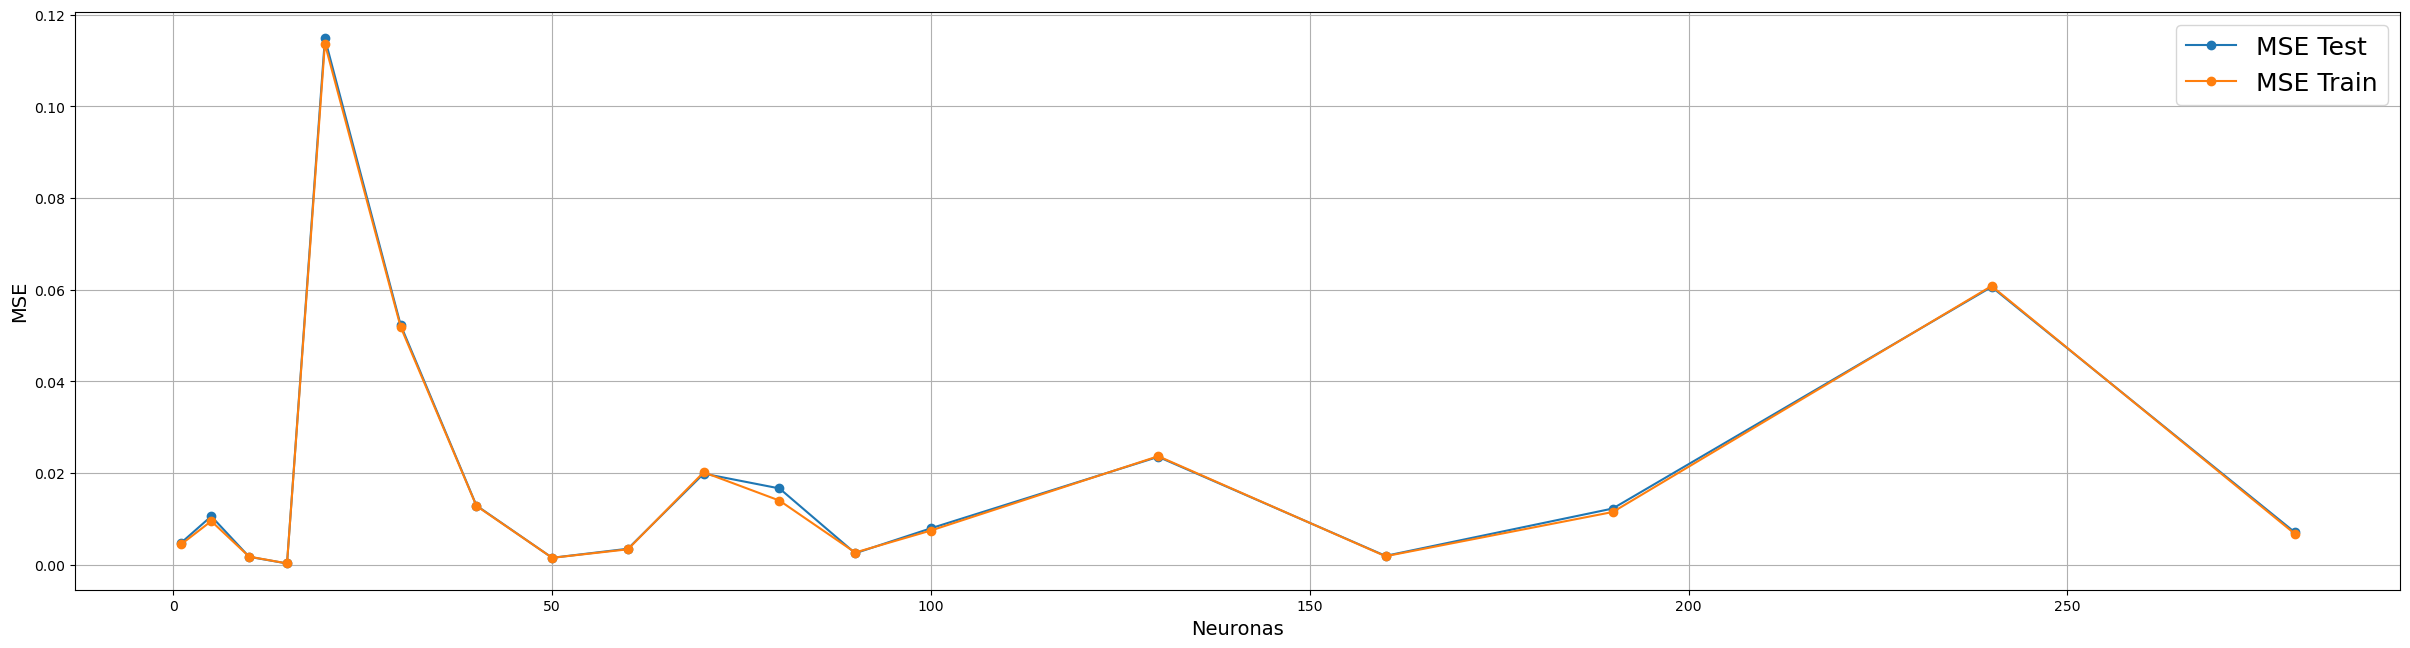

In [49]:
#Se grafica las listas de errores
plt.figure(figsize=(30,7.5))    #Tamaño de la figura
plt.plot(Neuronas,mse_test,'-o',label='MSE Test')   #Tipo de grafica y label del error de prueba
plt.plot(Neuronas,mse_train,'-o',label='MSE Train') #Tipo de grafica y label del error de entrenamiento
plt.xlabel('Neuronas',fontsize=14)  #Label y tamaño del label del eje x
plt.ylabel('MSE',fontsize=14)   #Label y tamaño del label del eje y
plt.legend(fontsize=18) #Tamaño de los numeros
plt.grid()  #Mostrar grilla
plt.show()  #Mostrar grafica

De la grafica anterior se concluye que el menor error para ambos conjuntos de datos se obtiene con 15 neuronas en la capa oculta.

## Entrenamiento del modelo

Se entrena el modelo con los datos de entrenamiento usando 15 neuronas en la capa oculta.

In [50]:
mlr = MLPRegressor(hidden_layer_sizes=(15,)) #Definir el modelo con 15 neuronas en la capa oculta
mlr.fit(X_train,y_train)    #Entrenar el modelo con los datos de entrenamiento

MLPRegressor(hidden_layer_sizes=(15,))

Se guarda el modelo entrenado.

In [65]:
import pickle   #Guardar el modelo

with open('modelo_entrenado.pkl', 'wb') as archivo:
    pickle.dump(mlr, archivo)

# Predicción de prioridad

Se realiza la predicción de prioridad para los datos de prueba y se muestra graficamente los resultados predichos y los esperados para un subconjunto de los datos de prueba.

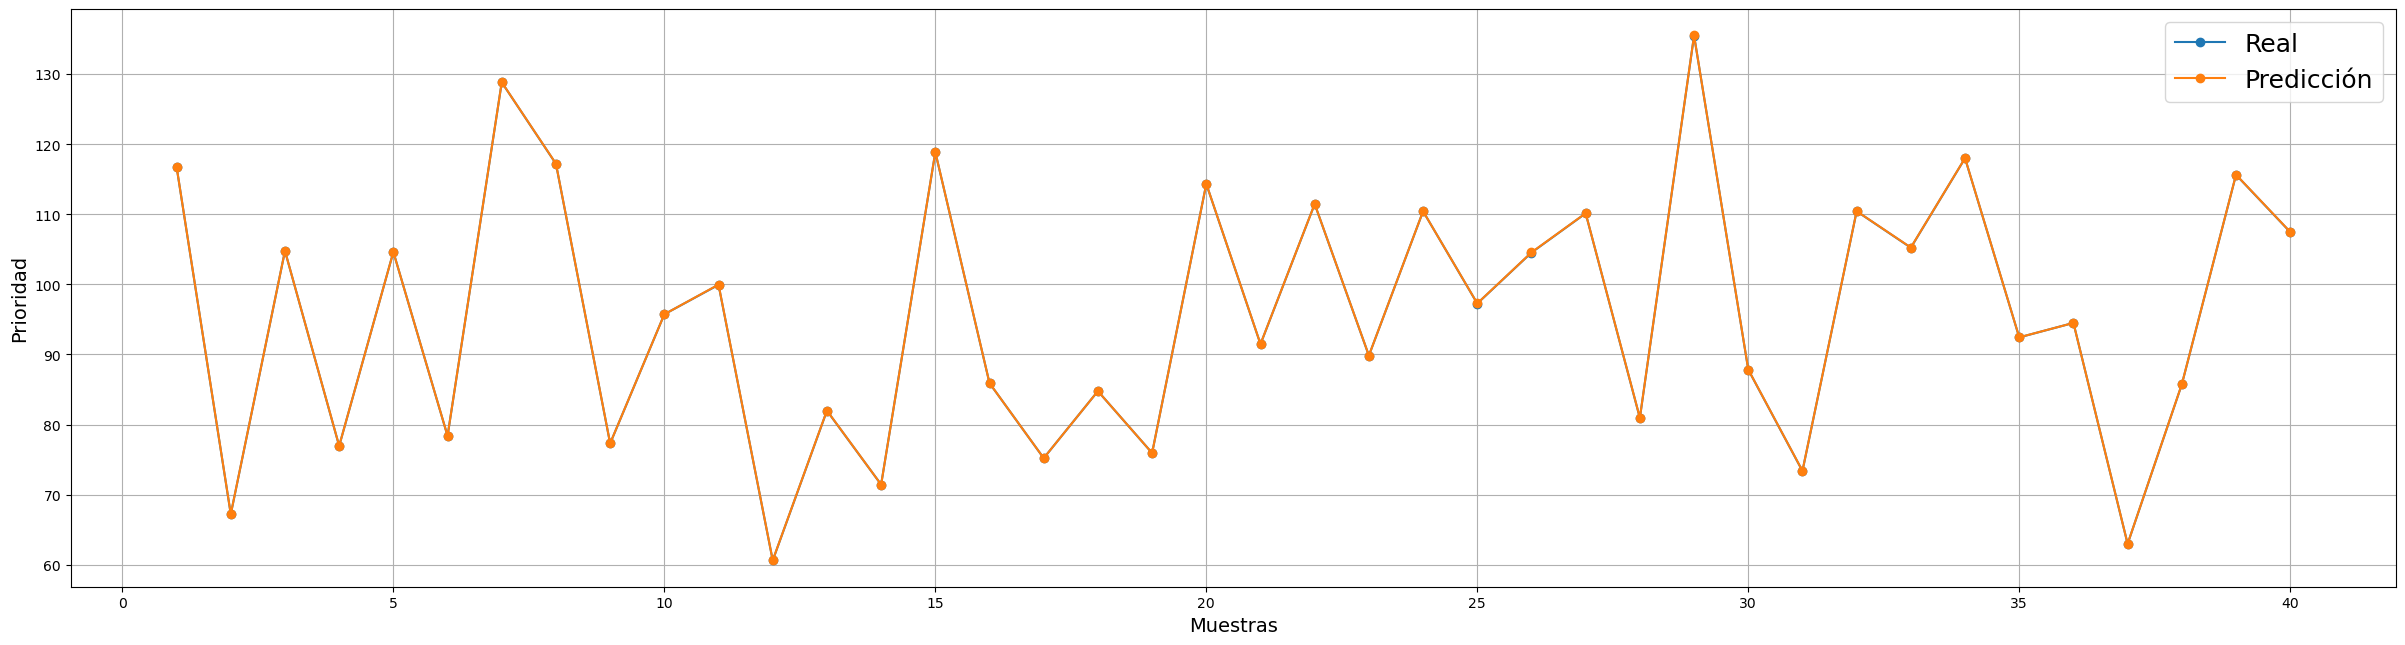

Rendimiento del modelo:  0.9999974876940121
MSE result:  0.000724808150244136
MAE result:  0.02100205182575512


In [51]:
import numpy as np  #Manejo de arreglos

y_pred = mlr.predict(X_test)    #Predecir con los datos de prueba
plt.figure(figsize=(30,7.5))    #Tamaño de la figura
plt.plot(np.arange(1,41),y_test[0:40],'-o',label='Real')    #Tipo de grafica y label de prioridad real
plt.plot(np.arange(1,41),y_pred[0:40],'-o',label='Predicción')  #Tipo de grafica y label de prioridad predicha
plt.xlabel('Muestras',fontsize=14)  #Label y tamaño del label del eje x
plt.ylabel('Prioridad',fontsize=14) #Label y tamaño del label del eje y
plt.legend(fontsize=18) #Tamaño de los numeros
plt.grid()  #Mostrar grilla
plt.show()  #Mostrar grafica

print("Rendimiento del modelo: ", mlr.score(X_train,y_train))   #Rendimiento del modelo
print("MSE result: ", MSE(y_test,y_pred))   #MSE entre el valor real y el predicho
print("MAE result: ", MAE(y_test,y_pred))   #MAE entre el valor real y el predicho

## Lista de vulnerabilidades

A continuación se presenta el top 10 de vulnerabilidades con mayor prioridad predicha del conjunto de pruebas.

In [64]:
X_test_pred = X_test.assign(y_pred = y_pred)    #Agregar la columna de Prioridades predicha
top_10_filas = X_test_pred.nlargest(10, 'y_pred')   #Elegir el top 10 de Prioridades más altas predichas
top_10_ids = top_10_filas.index #Extraer el indice del top 10
dataframe[dataframe.index.isin(top_10_ids)] #Extraer las filas cuyo indice corresponde con el top 10

,Unnamed: 0,Related Finding,Vulnerability Id,Where,Stream,Specific,Description,Status,Severity,Requirements,...,Integrity Impact,Availability Impact,Exploitability,Remediation Level,Report Confidence,CWE ids,Commit Hash,Root Nickname,Group,CVSS_Score
323,323,https://huntr.dev/bounties/d93259aa-ad03-43d6-...,CVE-2022-0401,security@huntr.dev,-,-,Path Traversal in NPM w-zip prior to 1.0.12.,OPEN,CRITICAL,-,...,HIGH,HIGH,High,Official Fix,Confirmed,CWE-22,-,-,-,9.8
3129,3129,https://www.oracle.com/security-alerts/cpujan2...,CVE-2022-21390,secalert_us@oracle.com,-,-,Vulnerability in the Oracle Communications Bil...,OPEN,CRITICAL,-,...,HIGH,HIGH,Functional,Official Fix,Confirmed,NVD-CWE-noinfo,-,-,-,10.0
4286,4286,https://community.ui.com/releases/Security-Adv...,CVE-2022-22570,support@hackerone.com,-,-,A buffer overflow vulnerability found in the U...,OPEN,CRITICAL,-,...,HIGH,HIGH,High,Official Fix,Confirmed,CWE-120,-,-,-,10.0
4542,4542,https://www.pentest.com.tr/exploits/Servisnet-...,CVE-2022-22832,cve@mitre.org,-,-,An issue was discovered in Servisnet Tessa 0.0...,OPEN,CRITICAL,-,...,HIGH,HIGH,High,Official Fix,Confirmed,CWE-639,-,-,-,9.8
4817,4817,https://www.redteam-pentesting.de/advisories/r...,CVE-2022-23178,cve@mitre.org,-,-,An issue was discovered on Crestron HD-MD4X2-4...,OPEN,CRITICAL,-,...,HIGH,HIGH,Functional,Official Fix,Confirmed,CWE-287,-,-,-,9.8
5391,5391,https://github.com/libexpat/libexpat/pull/550,CVE-2022-23852,cve@mitre.org,-,-,Expat (aka libexpat) before 2.4.4 has a signed...,OPEN,CRITICAL,-,...,HIGH,HIGH,High,Official Fix,Confirmed,CWE-190,-,-,-,9.8
5698,5698,https://github.com/jsjbcyber/bug_report/blob/m...,CVE-2022-24221,cve@mitre.org,-,-,eliteCMS v1.0 was discovered to contain a SQL ...,OPEN,CRITICAL,-,...,HIGH,HIGH,High,Official Fix,Confirmed,CWE-89,-,-,-,9.8
7888,7888,https://success.trendmicro.com/solution/000290678,CVE-2022-26871,security@trendmicro.com,-,-,An arbitrary file upload vulnerability in Tren...,OPEN,CRITICAL,-,...,HIGH,HIGH,High,Official Fix,Confirmed,CWE-345,-,-,-,9.8
8085,8085,https://github.com/pear/pearweb/commit/6447c17...,CVE-2022-27158,cve@mitre.org,-,-,pearweb < 1.32 suffers from Deserialization of...,OPEN,CRITICAL,-,...,HIGH,HIGH,High,Official Fix,Confirmed,CWE-502,-,-,-,9.8
9596,9596,https://eslam.io/posts/ejs-server-side-templat...,CVE-2022-29078,cve@mitre.org,-,-,The ejs (aka Embedded JavaScript templates) pa...,OPEN,CRITICAL,-,...,HIGH,HIGH,High,Official Fix,Confirmed,CWE-94,-,-,-,9.8


## Adaptar el modelo

Se genera una función para adaptar el modelo entrenado y que reciba datos en el formato del archivo de ejemplo. Esta función recibe como entrada el nombre del archivo y como salida muestra las vulnerabilidades ordenadas de mayor a menor prioridad.

In [28]:
def predict(filename):
    import pandas as pd #Manejo de tablas

    dataframe = pd.read_csv(filename)  #Se guarda el dataset en un dataframe

    dataframe['CVSS_Score'] = dataframe['Severity'].astype(float) #Crear la columna CVSS_Score

    #Cambiar los valores de severidad por el respectivo 'LOW', 'MEDIUM', 'HIGH', 'CRITICAL'
    rangos = [0.1, 3.9, 6.9, 8.9, 10.0] #Rangos de las etiquetas
    etiquetas = ['LOW', 'MEDIUM', 'HIGH', 'CRITICAL']   #Etiquetas

    #Reemplazar los valores de severidad por s respectiva etiqueta
    dataframe['Severity'] = pd.cut(dataframe['CVSS_Score'], bins=rangos, labels=etiquetas, include_lowest=True)

    #Extraer las columnas que contengan información relevante
    new_df = dataframe[['Severity',
                        'Type',
                        'Age in days',
                        'Attack Vector',
                        'Attack Complexity',
                        'Privileges Required',
                        'User Interaction',
                        'Severity Scope',
                        'Confidentiality Impact',
                        'Integrity Impact',
                        'Availability Impact',
                        'Exploitability',
                        'Remediation Level',
                        'CVSS_Score']]

    #No mostrar las advertencias de manera global
    import warnings
    warnings.filterwarnings("ignore")

    mapeo = {'LOW': 1, 'MEDIUM': 2, 'HIGH': 3, 'CRITICAL': 4}   #mapeo columna Severity
    new_df['Severity'] = pd.Categorical(new_df['Severity'], categories=['LOW', 'MEDIUM', 'HIGH', 'CRITICAL'])   #Definir Severity como categorica
    new_df['Severity'] = new_df['Severity'].map(mapeo)    #Reemplazar valores de Severity

    #mapeo columna Type
    mapeo = {'Brute Force Attacks':1,
            'Man-in-the-Middle (MitM) Attacks':2,
            'Malware (Viruses, Trojans, Worms)':3,
            'Cross-Site Scripting (XSS)':4,
            'SQL Injection':5,
            'Distributed Denial of Service (DDoS)':6,
            'Advanced Persistent Threats (APTs)':7
    }
    new_df['Type'] = new_df['Type'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de Type

    #mapeo columna Attack Vector
    mapeo = {'NETWORK':4, 'Network':4,
            'ADJACENT_NETWORK':3, 'Adjacent':3,
            'LOCAL':2, 'Local':2,
            'PHYSICAL':1, 'Physical':1
    }
    new_df['Attack Vector'] = new_df['Attack Vector'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de Attack Vector

    mapeo = {'LOW':2, 'Low':2, 'HIGH':1, 'High':1} #mapeo columna Attack Complexity
    new_df['Attack Complexity'] = new_df['Attack Complexity'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de Attack Complexity

    mapeo = {'NONE':3, 'None':3, 'LOW':2, 'Low':2, 'HIGH':1, 'High':1}   #mapeo columna Privileges Required
    new_df['Privileges Required'] = new_df['Privileges Required'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de Privileges Required

    mapeo = {'NONE':2, 'None':2, 'REQUIRED':1, 'Required':1}    #mapeo columna User Interaction
    new_df['User Interaction'] = new_df['User Interaction'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de User Interaction

    mapeo = {'UNCHANGED':1, 'Unchanged':1, 'CHANGED':2, 'Changed':2}  #mapeo de columna Severity Scope
    new_df['Severity Scope'] = new_df['Severity Scope'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de Severity Scope

    mapeo = {'NONE':1, 'None':1, 'LOW':2, 'Low':2, 'HIGH':3, 'High':3}  #mapeo de columna Confidentiality Impact, Integrity Impact, Availability Impact
    new_df['Confidentiality Impact'] = new_df['Confidentiality Impact'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de Confidentiality Impact
    new_df['Integrity Impact'] = new_df['Integrity Impact'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de Integrity Impact
    new_df['Availability Impact'] = new_df['Availability Impact'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de Availability Impact

    mapeo = {'Unproven':1, 'Functional':2, 'High':3}  #mapeo de columna Exploitability
    new_df['Exploitability'] = new_df['Exploitability'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de Exploitability

    mapeo = {'Official Fix':1, 'Unavailable':2}  #mapeo de columna Remediation Level
    new_df['Remediation Level'] = new_df['Remediation Level'].map(mapeo).fillna(0).astype(int)    #Reemplazar valores de Remediation Level

    import pickle   #Abrir el modelo

    #Cargar el modelo desde el archivo
    with open('modelo_entrenado.pkl', 'rb') as archivo:
        mlr = pickle.load(archivo)

    y_pred = mlr.predict(new_df)    #Predecir las prioridades

    dataframe_pred = dataframe.assign(Priority = y_pred)    #Agregar la columna de Prioridades predicha
    return dataframe_pred.sort_values(by='Priority', ascending=False) #Ordenar las filas de mayor a menor Prioridad

## Ejemplo

A continuación se presenta un ejemplo de como usar la función, es necesario que el modelo entrenado 'modelo_entrenado.pkl' se encuentre en el directorio desde donde se ejecuta la función.

In [30]:
filename = 'RetoTecnicoDataEjemplo.csv' #Nombre del archivo

predict(filename)

,Related Finding,Vulnerability Id,Where,Stream,Specific,Description,Status,Severity,Requirements,Impact,...,Availability Impact,Exploitability,Remediation Level,Report Confidence,CWE ids,Commit Hash,Root Nickname,Group,CVSS_Score,Priority
2,367. Sensitive information in source code - Gi...,1eddcbed-3730-4049-b277-4a1cafb16d46,micros_st/infrastructure/driven-adapters/sig/B...,-,20,"Información sensible como nombres de usuario, ...",OPEN,CRITICAL,145. Las llaves asimétricas privadas o simétri...,Obtener información sensible para comprometer ...,...,High,High,Unavailable,Confirmed,CWE-114\nCWE-1392\nCWE-1393\nCWE-1394\nCWE-259...,dcebbc2,ANUs_MR,abe4,9.9,98.492325
1,105. Apache lucene query injection,894cc894-5aaf-447d-92fe-6c85317ae064,https://test.us-south.cos.my.net/traile/RequdFull,-,RequestBody,Se genera dinámicamente una consulta para real...,OPEN,HIGH,REQ.0169. Debe usarse construcciones parametri...,#�NOMBRE?,...,None,High,Unavailable,Confirmed,CWE-112\nCWE-116\nCWE-1284\nCWE-1287\nCWE-130\...,-,-,sa2,8.2,76.793330
3,158. Unrestricted access between network segme...,1abd8e7d-3fbe-44e1-bf40-968af52c698d,tst/Contciones.jmx,-,23,Es posible acceder y utilizar los servicios Az...,OPEN,HIGH,255. Los segmentos de usuarios y servidores co...,#�NOMBRE?,...,None,High,Unavailable,Confirmed,NaN,396596a,ANUnd,sha4,7.7,73.334566
4,393. Use of software with known vulnerabilitie...,b411e2ff-992d-4aa0-ac97-b795a16a40f4,package-lock.json (ws v6.2.1) [CVE-2021-32640],-,17075,El sistema usa la versión de un software o dep...,OPEN,MEDIUM,Componentes con dependencias mínimas\nVerifica...,Explotar vulnerabilidades públicas de los comp...,...,Low,Unproven,Unavailable,Confirmed,CWE-1035\nCWE-400\nCWE-937,e28de1f,AW1_MAP,spr6,4.5,50.942696
5,325. Excessive privileges - Wildcards,619d5e97-97fe-4702-9fa0-5ee9607ae341,couchdb/cloudformation/template-couchdb-iam.yaml,-,31,- Se otorgan privilegios con wildcard (*) en a...,OPEN,LOW,Definir usuarios con privilegios\nEstablecer p...,Realizar acciones delicadas con roles que no l...,...,Low,Unproven,Unavailable,Confirmed,CWE-250\nCWE-266\nCWE-269\nCWE-272\nCWE-276\nC...,759d8af,Clouia,wa9,3.8,50.319188
0,221. Business information leak - Users,916112a4-8f9f-486f-b78e-c36a50c0e071,Ingerver/pipelines/soapui-tests.xml,-,141,"Se obtiene información de negocio, como:\n- Li...",OPEN,LOW,REQ.0176. El sistema debe restringir el acceso...,Atacante interno con acceso al código,...,None,Functional,Official Fix,Confirmed,CWE-200\nCWE-284\nCWE-285\nCWE-359\nCWE-377\nC...,-,-,al1,2.3,39.318686
